<a href="https://colab.research.google.com/github/GHIFFARISANUSI-DATA/first_file/blob/main/Diamond_Price_Prediction_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

#Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


#Input Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
files_dir = "/content/drive/MyDrive/Digital Skola/Final Project"
os.chdir(files_dir)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Digital Skola/Final Project'

In [ ]:
df = pd.read_csv ('/content/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df['Unnamed: 0'].unique()

array([    1,     2,     3, ..., 53938, 53939, 53940])

In [ ]:
df.rename(columns={'Unnamed: 0': 'No diamonds'}, inplace=True) #mengisi nama colom Unnamed: 0 menjadi No diamonds yang akan dijadikan sebagai identity


In [ ]:
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['color'].value_counts() #J (worst) to D (best)

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df['clarity'].value_counts() #I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [ ]:
df['depth'].unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [ ]:
df['table'].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [ ]:
df['price'].unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756])

In [ ]:
df['x'].unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

In [ ]:
df['y'].unique()

array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

In [ ]:
df['z'].unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

#Exploratory Data Analysis

In [ ]:
df.isnull().sum() #mengecek apakah ada nilai 0

,0
No diamonds,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
# Menangani Nilai Hilang (Jika Ada)
df.fillna(df.median(numeric_only=True), inplace=True)  # Mengisi nilai hilang dengan median

In [ ]:
#Cari Row yang bernilai 0
zero_count = (df == 0).sum()
print(zero_count)

No diamonds     0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
price           0
x               8
y               7
z              20
dtype: int64


In [ ]:
df.replace(0, np.nan, inplace=True)  # Mengubah 0 menjadi NaN
df.fillna(df.median(numeric_only=True), inplace=True)  # Mengisi dengan median

In [ ]:
zero_count = (df == 0).sum()
print(zero_count)

No diamonds    0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              0
y              0
z              0
dtype: int64


Text(0.5, 1.0, 'Distribution of Price')

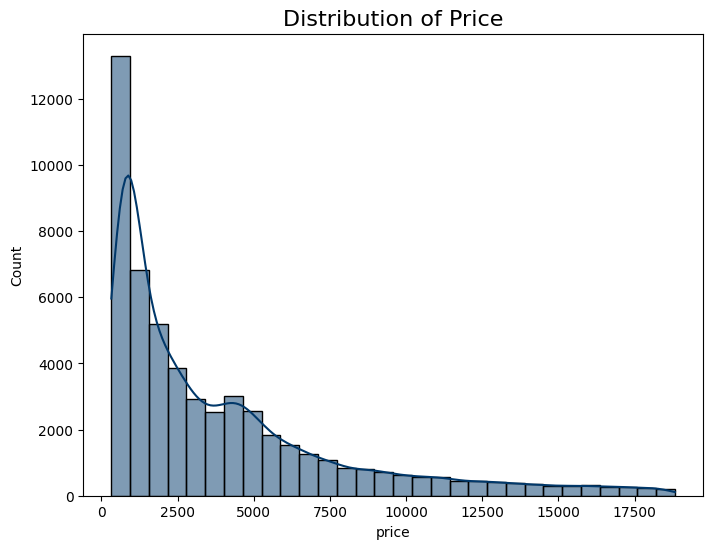

In [ ]:
price_hist, axp = plt.subplots(figsize=(8,6))
sns.histplot(data=df, x='price', kde=True, ax=axp, bins=30, color="xkcd:marine blue")
axp.set_title("Distribution of Price", fontsize=16, fontweight="book")

In [ ]:
df_vars = df.copy()
num_vars = df_vars.select_dtypes(include=np.number)
num_vars = num_vars.drop('No diamonds', axis=1)
num_vars = num_vars.drop('price', axis=1)
num_vars.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


Text(0.5, 0.92, 'Distribution of feature variables')

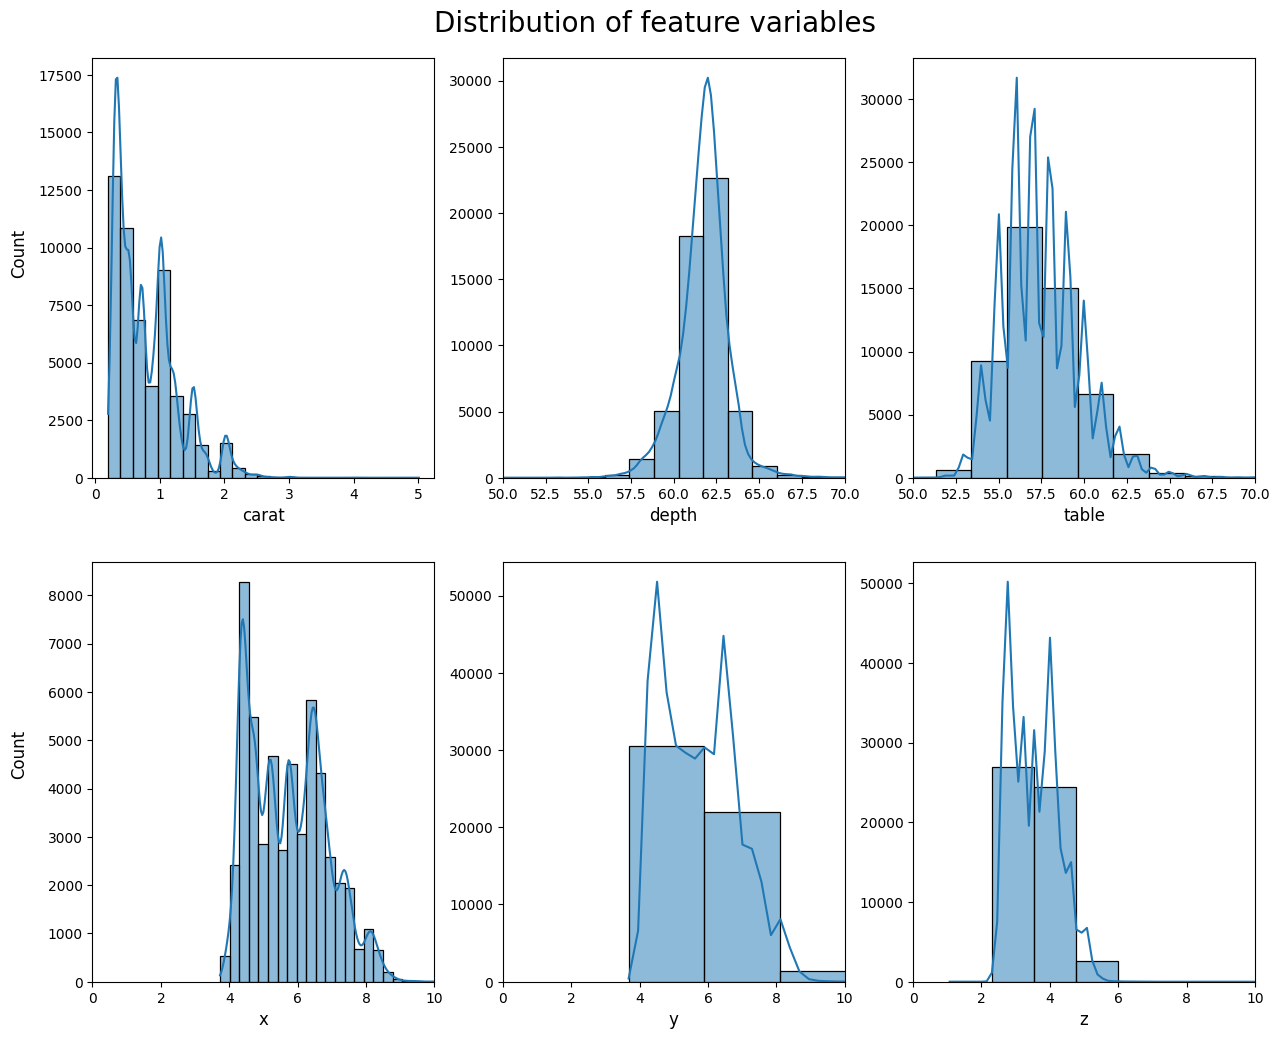

In [ ]:
hist_fig, _ = plt.subplots(2,3, figsize=(15,12))
axs= hist_fig.axes
for i, col in enumerate(num_vars.columns):
    sns.histplot(data=num_vars, x=col, kde=True, bins=25, ax=axs[i])

for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(None)
    if ax.get_xlabel() in ['x','y', 'z']:
        ax.set_xlim(0,10)
    if ax.get_xlabel() in ['table', 'depth']:
        ax.set_xlim(50,70)

hist_fig.text(s="Count", x=0.07, y=0.7, rotation=90, fontsize="large")
hist_fig.supylabel("Count", x=0.07, y=0.3)
hist_fig.figure.suptitle(
        "Distribution of feature variables",
        x=0.5,
        y=0.92,
        fontsize=20,
        fontweight="book"
    )

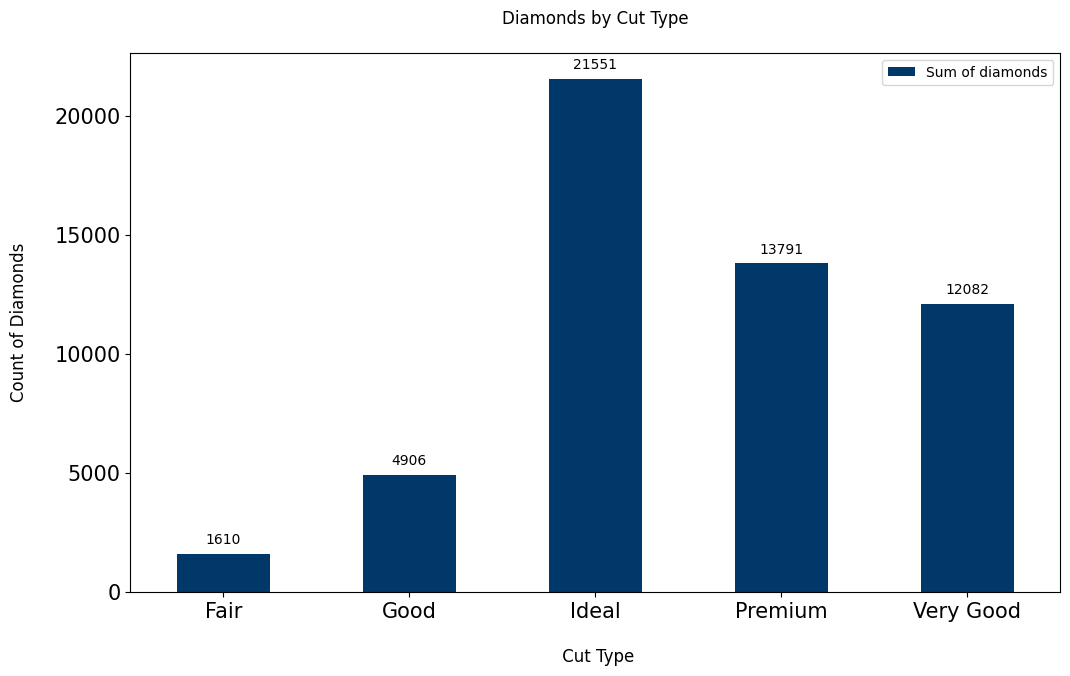

In [ ]:
cut_split = df[["No diamonds", "cut"]]
sectors = cut_split.groupby ("cut")
cut_split = pd.DataFrame(sectors["No diamonds"].count())
cut_split.rename (columns = {'No diamonds' : 'Sum of diamonds'}, inplace=True )

ax = cut_split[["Sum of diamonds"]].plot.bar(title = 'Diamonds by Cut type', legend = True, table = False, grid = False,
                                                   subplots = False, figsize = (12,7), color ="xkcd:marine blue", fontsize = 15, stacked=False)


plt.ylabel ('Count of Diamonds\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.xlabel ('\n Cut Type', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.title ('Diamonds by Cut Type\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.legend(loc = 'upper right', fontsize = 'medium')
plt.xticks (rotation = 0, horizontalalignment = "center")
plt.yticks (rotation = 0, horizontalalignment = "right")

x_labels = np.array(cut_split[["Sum of diamonds"]])

def add_value_labels (ax, spacing = 5):
  for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = spacing
    va = 'bottom'
    if y_value < 0:
      space *= -1
      va = 'top'
    label ="{:.0f}".format (y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext = (0, space),
        textcoords = "offset points",
        ha = 'center',
        va = va
    )
add_value_labels (ax)

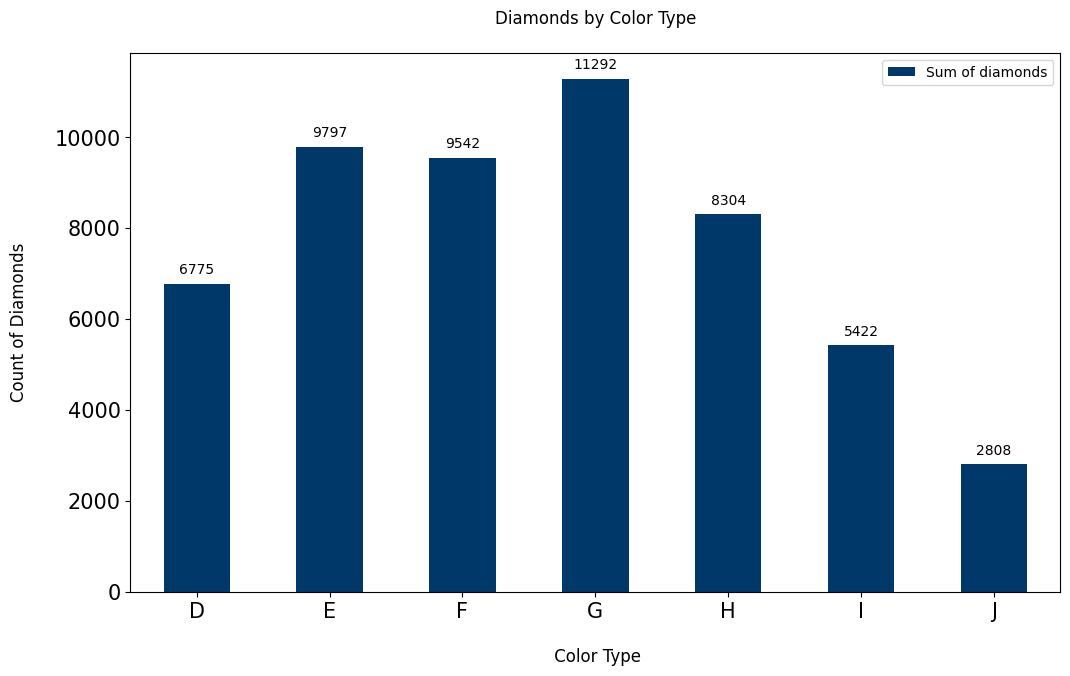

In [ ]:
color_split = df[["No diamonds", "color"]]
sectors = color_split.groupby ("color")
color_split = pd.DataFrame(sectors["No diamonds"].count())
color_split.rename (columns = {'No diamonds' : 'Sum of diamonds'}, inplace=True )

ax = color_split[["Sum of diamonds"]].plot.bar(title = 'Diamonds by Color type', legend = True, table = False, grid = False,
                                                   subplots = False, figsize = (12,7), color = "xkcd:marine blue", fontsize = 15, stacked=False)


plt.ylabel ('Count of Diamonds\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.xlabel ('\n Color Type', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.title ('Diamonds by Color Type\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.legend(loc = 'upper right', fontsize = 'medium')
plt.xticks (rotation = 0, horizontalalignment = "center")
plt.yticks (rotation = 0, horizontalalignment = "right")

x_labels = np.array(color_split[["Sum of diamonds"]])

def add_value_labels (ax, spacing = 5):
  for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = spacing
    va = 'bottom'
    if y_value < 0:
      space *= -1
      va = 'top'
    label ="{:.0f}".format (y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext = (0, space),
        textcoords = "offset points",
        ha = 'center',
        va = va
    )
add_value_labels (ax)

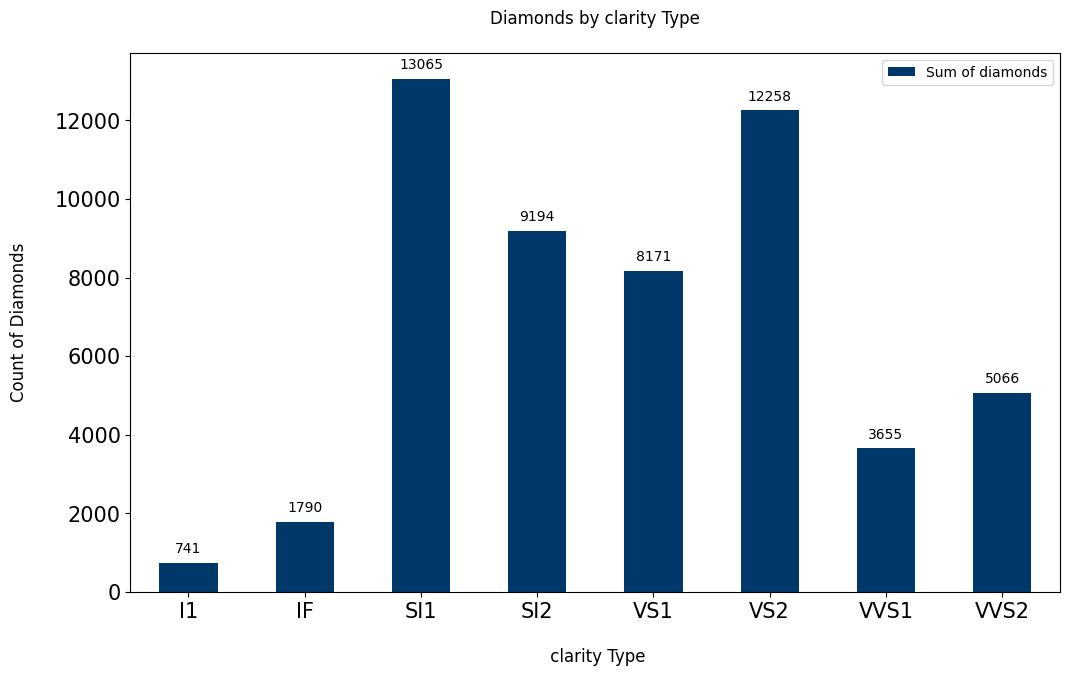

In [ ]:
clarity_split = df[["No diamonds", "clarity"]]
sectors = clarity_split.groupby ("clarity")
clarity_split = pd.DataFrame(sectors["No diamonds"].count())
clarity_split.rename (columns = {'No diamonds' : 'Sum of diamonds'}, inplace=True )

ax = clarity_split[["Sum of diamonds"]].plot.bar(title = 'Diamonds by clarity type', legend = True, table = False, grid = False,
                                                   subplots = False, figsize = (12,7), color = "xkcd:marine blue", fontsize = 15, stacked=False)


plt.ylabel ('Count of Diamonds\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.xlabel ('\n clarity Type', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.title ('Diamonds by clarity Type\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.legend(loc = 'upper right', fontsize = 'medium')
plt.xticks (rotation = 0, horizontalalignment = "center")
plt.yticks (rotation = 0, horizontalalignment = "right")

x_labels = np.array(clarity_split[["Sum of diamonds"]])

def add_value_labels (ax, spacing = 5):
  for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = spacing
    va = 'bottom'
    if y_value < 0:
      space *= -1
      va = 'top'
    label ="{:.0f}".format (y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext = (0, space),
        textcoords = "offset points",
        ha = 'center',
        va = va
    )
add_value_labels (ax)

##Resolving Outliers

In [ ]:
df_tmp = df.copy()
identity = df_tmp ["No diamonds"]

# Hapus 'No diamonds' dari dataset sebelum model training
df_tmp = df_tmp.drop (columns = "No diamonds")

In [ ]:
df_tmp = pd.concat ([df_tmp, identity], axis = 1)
df_tmp

,carat,cut,color,clarity,depth,table,price,x,y,z,No diamonds
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,53936
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,53937
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,53938
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,53939


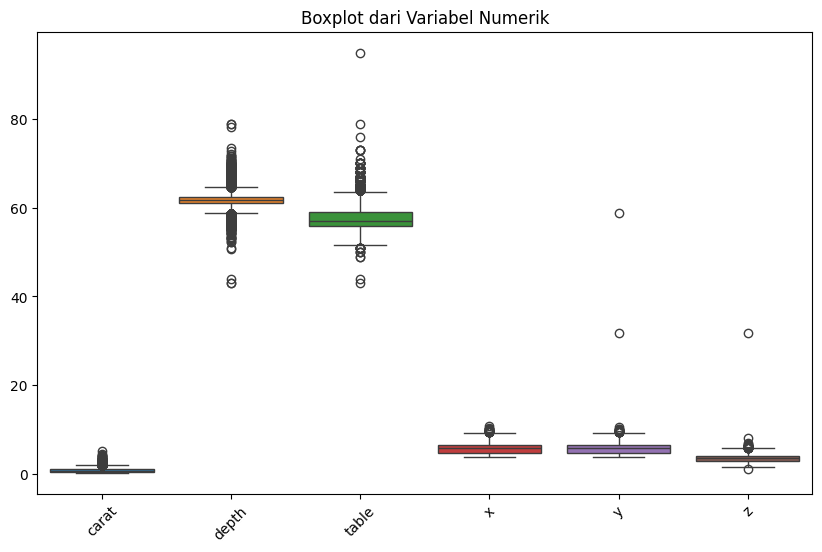

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmp[['carat', 'depth', 'table', 'x', 'y', 'z']])
plt.xticks(rotation=45)
plt.title("Boxplot dari Variabel Numerik")
plt.show()


In [ ]:
from scipy.stats import zscore

z_scores = df_tmp[['carat', 'depth', 'table', 'x', 'y', 'z']].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

print("Jumlah outlier per kolom:\n", outliers)

Jumlah outlier per kolom:
 carat    439
depth    685
table    336
x         35
y         27
z         36
dtype: int64


In [ ]:
# Menentukan kolom numerik
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Menghitung IQR hanya untuk kolom numerik
Q1 = df_tmp[numeric_cols].quantile(0.25)
Q3 = df_tmp[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


#Mengganti Outlier dengan Nilai Statistik (Capping)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_capped = df_tmp.copy()
for col in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    df_capped[col] = df_capped[col].clip(lower_bound[col], upper_bound[col])

df_tmp = df_capped
print("Outlier telah digantikan dengan batas IQR.")


Outlier telah digantikan dengan batas IQR.


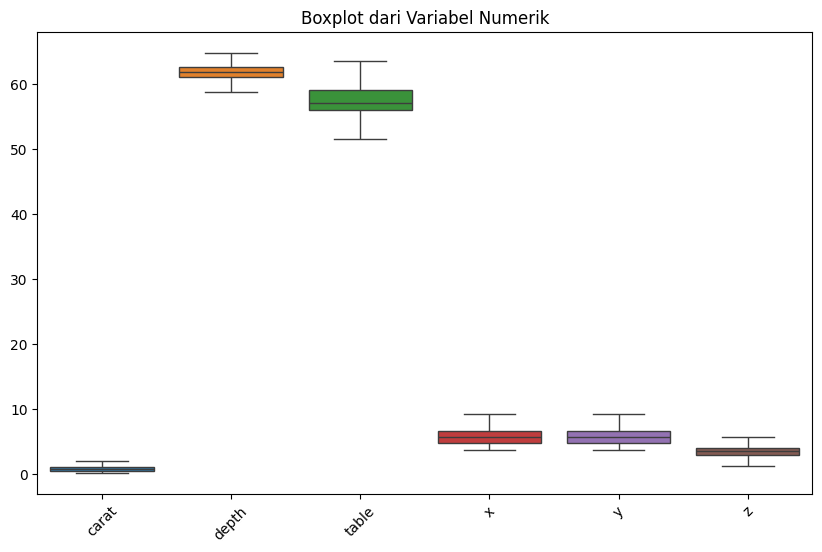

In [ ]:
#cek Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmp[['carat', 'depth', 'table', 'x', 'y', 'z']])
plt.xticks(rotation=45)
plt.title("Boxplot dari Variabel Numerik")
plt.show()

##Checking Correlation among features and target value

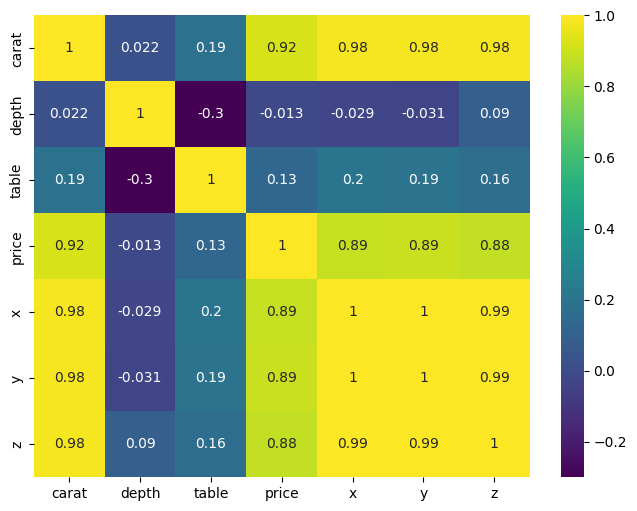

In [ ]:
# Hitung matriks korelasi hanya untuk kolom numerik
df_tmp = df_tmp.drop (columns = 'No diamonds')
corr = df_tmp.corr(numeric_only=True)

# Buat plot
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap="viridis", annot=True, ax=ax)

plt.show()

In [ ]:
# Memisahkan fitur dan target
target = df_tmp ['price']
df_tmp = df_tmp.drop (columns = 'price')

##Ordinal Encoding

In [ ]:
df_tmp.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
x,float64
y,float64
z,float64


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
df_tmp[['cut', 'color', 'clarity']] = df_tmp[['cut', 'color', 'clarity']].astype(str)

# Definisi kategori yang digunakan untuk encoding --> terburuk ke terbaik
categories = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    ["J", "I", "H", "G", "F", "E", "D"],                     #J(worst) to D(best)
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'] # I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
]

# Inisialisasi encoder
enc = OrdinalEncoder(categories=categories, handle_unknown="use_encoded_value", unknown_value=-1 )

# Lakukan encoding ke seluruh dataset
df_tmp[['cut', 'color', 'clarity']] = enc.fit_transform(df_tmp[['cut', 'color', 'clarity']])

# Pastikan hasil encoding dalam bentuk integer
df_tmp[['cut', 'color', 'clarity']] = df_tmp[['cut', 'color', 'clarity']].astype(int)

df_tmp

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.50,55.0,3.95,3.98,2.43
1,0.21,3,5,2,59.80,61.0,3.89,3.84,2.31
2,0.23,1,5,4,58.75,63.5,4.05,4.07,2.31
3,0.29,3,1,3,62.40,58.0,4.20,4.23,2.63
4,0.31,1,0,1,63.30,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.80,57.0,5.75,5.76,3.50
53936,0.72,1,6,2,63.10,55.0,5.69,5.75,3.61
53937,0.70,2,6,2,62.80,60.0,5.66,5.68,3.56
53938,0.86,3,2,1,61.00,58.0,6.15,6.12,3.74


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.7 MB


In [ ]:
df_tmp['cut'].unique()

array([4, 3, 1, 2, 0])

In [ ]:
df_tmp['color'].unique()

array([5, 1, 0, 2, 4, 3, 6])

In [ ]:
df_tmp['clarity'].unique()

array([1, 2, 4, 3, 5, 6, 0, 7])

#Generate Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (df_tmp, target,
                                                     test_size = 0.2, #80% sebagai data training 20% data testing #Use 0.1 if data is huge
                                                     random_state = 0)

In [ ]:
print ("Dimensi X_train dataset :",X_train.shape)
print ("Dimensi y_train dataset :",y_train.shape)
print ("Dimensi X_test dataset :",X_test.shape)
print ("Dimensi y_test dataset :",y_test.shape)

Dimensi X_train dataset : (43152, 9)
Dimensi y_train dataset : (43152,)
Dimensi X_test dataset : (10788, 9)
Dimensi y_test dataset : (10788,)


In [ ]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
26250,1.63,4,3,4,61.7,55.0,7.56,7.60,4.68
31510,0.34,4,3,3,62.2,57.0,4.47,4.44,2.77
40698,0.40,4,5,5,61.7,56.0,4.73,4.77,2.93
42634,0.58,3,2,2,62.1,55.0,5.38,5.35,3.33
47714,0.63,2,6,2,62.8,57.0,5.40,5.46,3.41


##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Menggunakan scaler hanya pada data training, lalu transform data test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
pd.DataFrame(X_train)

,carat,cut,color,clarity,depth,table,x,y,z
26250,1.830282,0.979549,-0.242251,0.574285,-0.040800,-1.127080,1.632124,1.678494,1.648957
31510,-0.989565,0.979549,-0.242251,-0.031962,0.352790,-0.201740,-1.127033,-1.163879,-1.112866
40698,-0.858409,0.979549,0.932907,1.180532,-0.040800,-0.664410,-0.894871,-0.867049,-0.881509
42634,-0.464942,0.084426,-0.829830,-0.638209,0.274072,-1.127080,-0.314466,-0.345348,-0.303117
47714,-0.355646,-0.810697,1.520486,-0.638209,0.825099,-0.201740,-0.296607,-0.246404,-0.187439
...,...,...,...,...,...,...,...,...,...
45891,-0.596098,0.084426,0.345328,-0.031962,-0.827981,0.723599,-0.493052,-0.534240,-0.592313
52416,-0.202631,-1.705821,1.520486,-0.638209,1.454843,1.186269,-0.126951,-0.201430,-0.042840
42613,-1.033284,0.084426,-1.417409,0.574285,-0.355672,0.260929,-1.234185,-1.208854,-1.243005
43567,-0.836550,0.979549,-0.242251,2.393027,-0.591827,-0.201740,-0.823437,-0.849060,-0.881509


In [ ]:
#info data train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 26250 to 2732
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  float64
 2   color    43152 non-null  float64
 3   clarity  43152 non-null  float64
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   x        43152 non-null  float64
 7   y        43152 non-null  float64
 8   z        43152 non-null  float64
dtypes: float64(9)
memory usage: 3.3 MB


#Model and Metrics Selection

##Linear Regression

In [ ]:
# Melatih model regresi

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Memprediksi data uji
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"- Regressor: {lr_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: LinearRegression
Mean Squared Error: 1288802.6522133516
R² Score: 0.9186961492847733


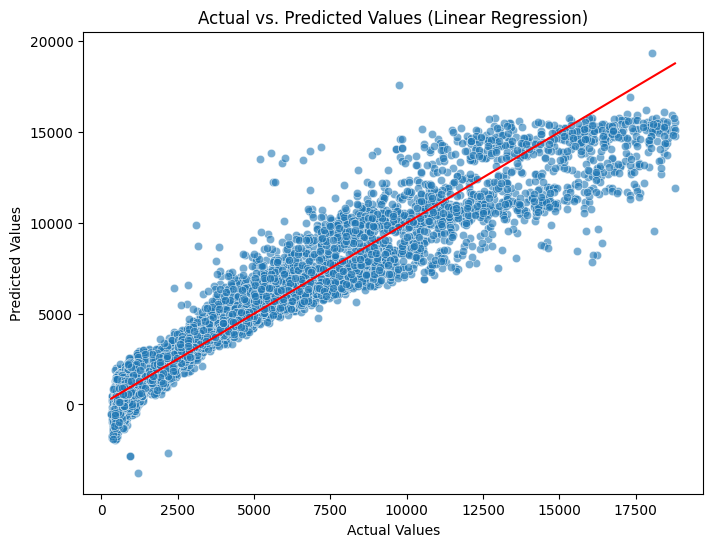

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()


##Random Forest Regression

In [ ]:
# Inisialisasi Random Forest Regressor
rf_model = RandomForestRegressor(random_state = 42)

# Latih model dengan data latih
rf_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"- Regressor: {rf_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: RandomForestRegressor
Mean Squared Error: 291091.9035237303
R² Score: 0.9816365270292859


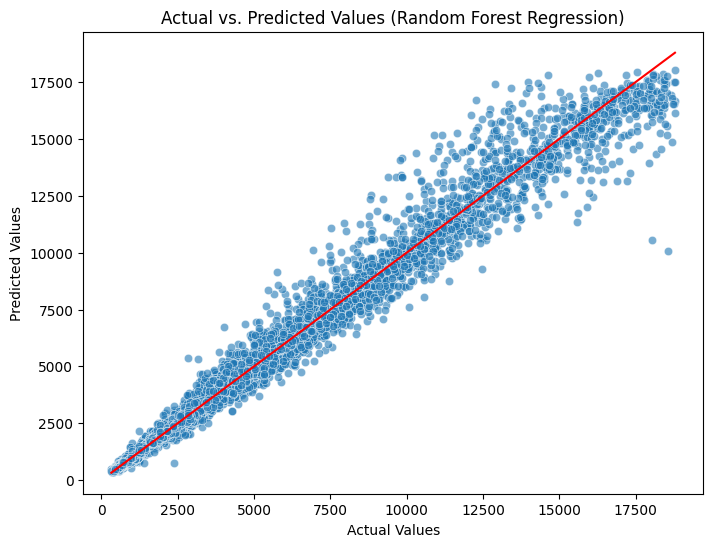

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest Regression)")
plt.show()

##Decision Tree Regression

In [ ]:
# Inisialisasi model
dtr_model = DecisionTreeRegressor(random_state = 42)

# Latih model dengan data latih
dtr_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_dtr = dtr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_dtr)
r2 = r2_score(y_test, y_pred_dtr)

print(f"- Regressor: {dtr_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: DecisionTreeRegressor
Mean Squared Error: 518167.7221913237
R² Score: 0.9673114956287984


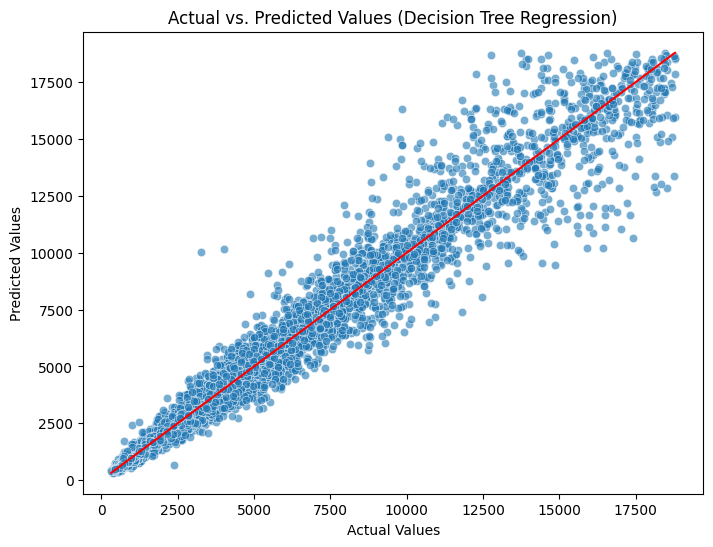

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_dtr, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree Regression)")
plt.show()

##XGBoost Regression

In [ ]:
# Inisialisasi model
xgbr_model = XGBRegressor(random_state = 42)

# Latih model dengan data latih
xgbr_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_xgbr = xgbr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_xgbr)
r2 = r2_score(y_test, y_pred_xgbr)

print(f"- Regressor: {xgbr_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: XGBRegressor
Mean Squared Error: 290432.65625
R² Score: 0.9816781282424927


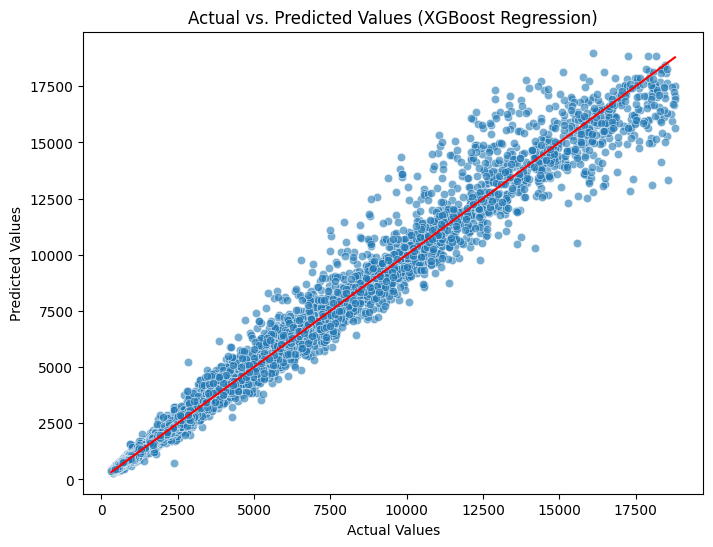

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgbr, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (XGBoost Regression)")
plt.show()

##LGBM Regression

In [ ]:
# Inisialisasi model
lgbmr_model = LGBMRegressor(random_state = 42)

# Latih model dengan data latih
lgbmr_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_lgbmr = lgbmr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_lgbmr)
r2 = r2_score(y_test, y_pred_lgbmr)

print(f"- Regressor: {lgbmr_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3933.696700
- Regressor: LGBMRegressor
Mean Squared Error: 294323.5619928988
R² Score: 0.9814326585182391


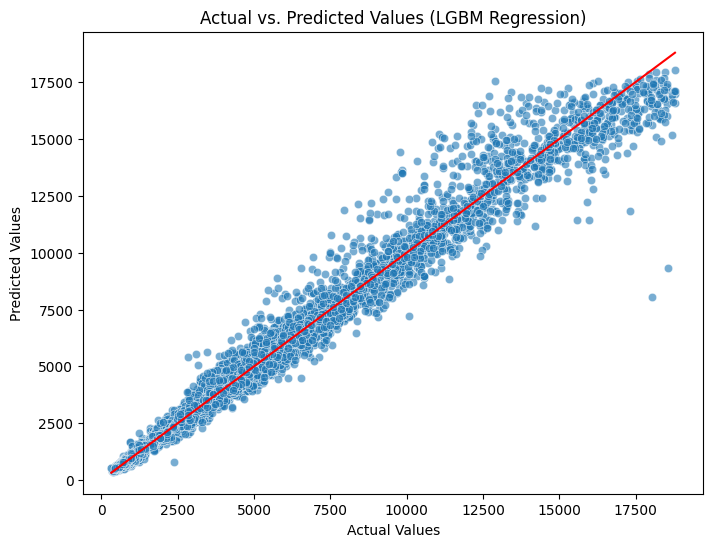

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lgbmr, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (LGBM Regression)")
plt.show()

##Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=0.001, max_iter=10000)

# Latih model dengan data latih
ridge_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_ridge = ridge_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"- Regressor: {ridge_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: Ridge
Mean Squared Error: 1288802.6582242928
R² Score: 0.9186961489055743


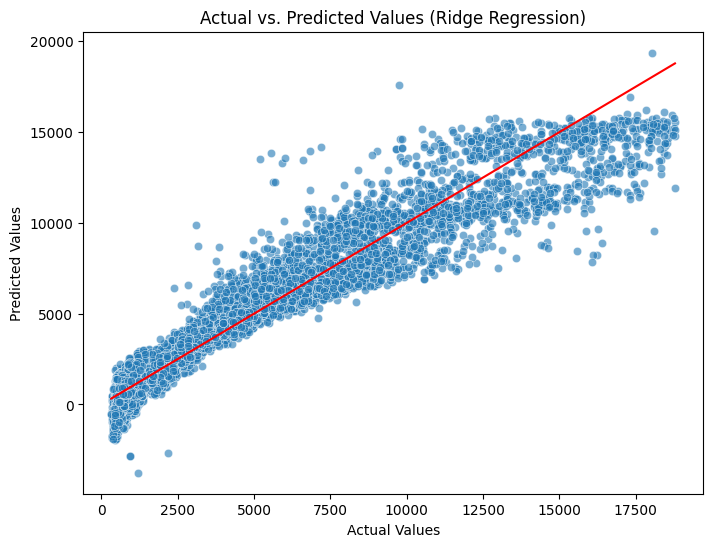

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Ridge Regression)")
plt.show()

##Lasso Regression

In [ ]:
lasso_model = Lasso(alpha=0.001, max_iter=10000)

# Latih model dengan data latih
lasso_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_lasso = lasso_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f"- Regressor: {lasso_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: Lasso
Mean Squared Error: 1288801.0265748634
R² Score: 0.9186962518378435


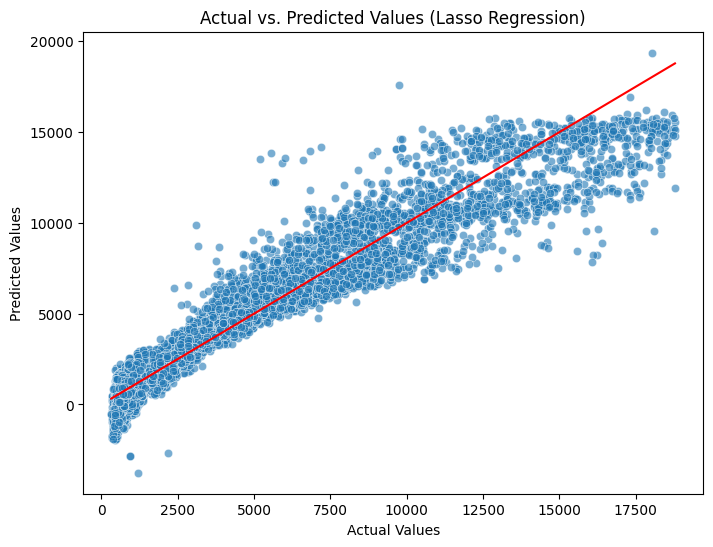

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.show()

##ElectricNet Regression

In [ ]:
elastic_model = ElasticNet(alpha=0.001, max_iter=10000)

# Latih model dengan data latih
elastic_model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_elastic = elastic_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_elastic)
r2 = r2_score(y_test, y_pred_elastic)

print(f"- Regressor: {elastic_model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

- Regressor: ElasticNet
Mean Squared Error: 1290322.0172021498
R² Score: 0.9186003004563905


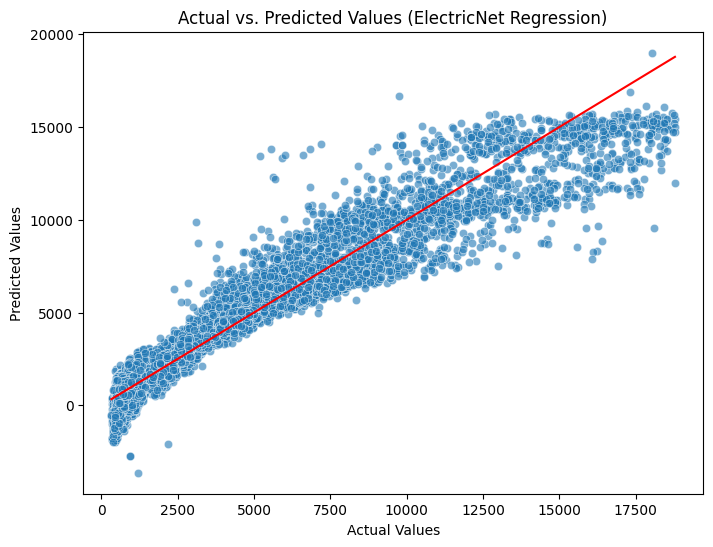

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_elastic, alpha=0.6)  # Plot titik hasil prediksi
sns.lineplot(x=y_test, y=y_test, color="red")  # Garis y = x untuk referensi (prediksi sempurna)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (ElectricNet Regression)")
plt.show()

#Evaluate and Compare Models

In [ ]:
models_name = ["Linear Regression","Decision Tree Regression","Random Forest Regression","XGBoost Regression" ,"LGBM Regression","Ridge Regression", "Lasso Regression", "ElasticNet Regression"]
models = [lr_model, dtr_model, rf_model, xgbr_model, lgbmr_model, ridge_model, lasso_model, elastic_model]  # Daftar model yang telah dilatih
y_preds = [y_pred_lr, y_pred_dtr, y_pred_rf, y_pred_xgbr, y_pred_lgbmr, y_pred_ridge, y_pred_lasso, y_pred_elastic]  # Daftar prediksi dari masing-masing model

In [ ]:
# Menyimpan MSE dan R² untuk setiap model
mse = []
r2 = []

# Melakukan evaluasi untuk setiap model
for y_pred in y_preds:
    mse_value = mean_squared_error(y_test, y_pred)
    mse.append(mse_value)
    r2.append(r2_score(y_test, y_pred))

# Membuat DataFrame untuk perbandingan
compare_models = pd.DataFrame({
    "Algorithms": models_name,
    "MSE": mse,
    "R²": r2
})

# Format MSE
compare_models["MSE"] = compare_models["MSE"].apply(lambda x: f"{x:.3f}")

# Format R²
compare_models["R²"] = compare_models["R²"].round(4)

compare_models

,Algorithms,MSE,R²
0,Linear Regression,1288802.652,0.9187
1,Decision Tree Regression,518167.722,0.9673
2,Random Forest Regression,291091.904,0.9816
3,XGBoost Regression,290432.656,0.9817
4,LGBM Regression,294323.562,0.9814
5,Ridge Regression,1288802.658,0.9187
6,Lasso Regression,1288801.027,0.9187
7,ElasticNet Regression,1290322.017,0.9186


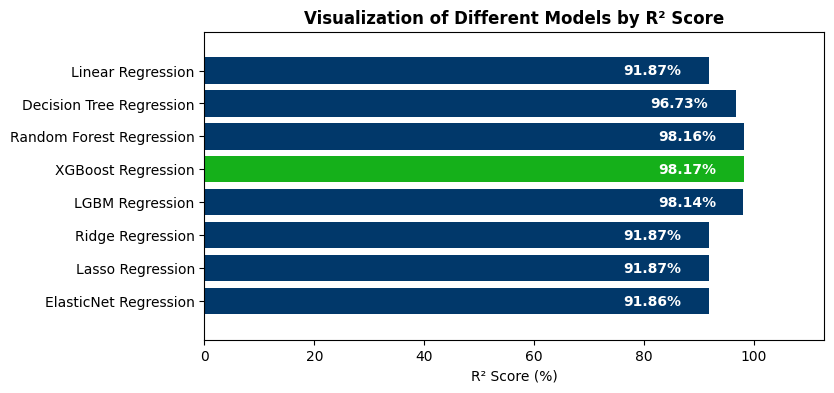

In [ ]:
import matplotlib.pyplot as plt

# Konversi R² ke skala persen
compare_models["R² (%)"] = compare_models["R²"] * 100

# Menentukan indeks model dengan R² tertinggi
max_r2_index = compare_models["R² (%)"].idxmax()
colors = ["xkcd:marine blue" if i != max_r2_index else "xkcd:green" for i in range(len(compare_models))]

# Membuat horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(compare_models["Algorithms"], compare_models["R² (%)"], color=colors)

# Membalik urutan sumbu Y agar model dengan nilai tertinggi di atas
ax.invert_yaxis()

plt.xlabel("R² Score (%)")  # Label sumbu X
plt.title("Visualization of Different Models by R² Score", fontweight="bold")

# Menyesuaikan batas X untuk memberi ruang bagi label
max_r2_value = max(compare_models["R² (%)"])
plt.xlim(0, max_r2_value * 1.15)  # Tambah 15% ruang ekstra untuk label

# Tambahkan margin agar tidak terlalu mepet
ax.margins(y=0.1)  # Beri sedikit ruang vertikal agar tidak terpotong

# Menambahkan label nilai di dalam batang agar tidak keluar grafik
for bar in bars:
    xval = bar.get_width()  # Panjang batang (nilai R² dalam %)
    if xval > max_r2_value * 0.85:
        # Jika nilainya besar, taruh label di dalam batang dengan warna putih
        ax.text(xval - 5, bar.get_y() + bar.get_height()/2, f"{xval:.2f}%",
                ha='right', va='center', fontsize=10, color='white', fontweight='bold')
    else:
        # Jika kecil, tetap taruh di luar
        ax.text(xval + 1, bar.get_y() + bar.get_height()/2, f"{xval:.2f}%",
                ha='left', va='center', fontsize=10, color='black')

plt.show()




In [ ]:
# Memprediksi nilai target untuk data uji & train model XGBoost Regression
y_pred_train_xgbr = xgbr_model.predict(X_train)
y_pred_test_xgbr = xgbr_model.predict(X_test)

# Evaluasi model untuk Training dan Testing
train_r2_xgbr = r2_score(y_train, y_pred_train_xgbr)
test_r2_xgbr = r2_score(y_test, y_pred_test_xgbr)

In [ ]:
print(f"Training R² Score: {train_r2_xgbr}")
print(f"Testing R² Score: {test_r2_xgbr}")

Training R² Score: 0.9903516173362732
Testing R² Score: 0.9816781282424927


Model XGBoost Regression memiliki akurasi tinggi di training dan testing set (Nilai R² mendekati 1), serta perbedaan antara training dan testing score cukup kecil sehingga tidak ada overfitting

#Conclusion

Kesimpulan dari perbandingan Model, model XGBoost Regression adalah model terbaik karena nilai MSE terendah dan nilai R² Score tertinggi sehingga dapat menghasilkan prediksi yang cukup andal dengan model ini.

#Deployment Preparation

In [ ]:
import pickle
pickle.dump(xgbr_model, open('xgbr_model.pkl', 'wb'))

In [ ]:
import joblib

# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Simpan encoder
joblib.dump(enc, "encoder.pkl")

['encoder.pkl']

#New Data

In [ ]:
#Data diluat dataset awal
data_baru = {
    'carat': [0.5],
    'cut': ['Premium'],
    'color': ['G'],
    'clarity': ['VS2'],
    'depth': [62.1],
    'table': [57.1],
    'x': [5.3],
    'y': [5.4],
    'z': [3.2]
}

# Konversi ke DataFrame
df_baru = pd.DataFrame(data_baru)

df_baru

,carat,cut,color,clarity,depth,table,x,y,z
0,0.5,Premium,G,VS2,62.1,57.1,5.3,5.4,3.2


In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    1 non-null      float64
 1   cut      1 non-null      object 
 2   color    1 non-null      object 
 3   clarity  1 non-null      object 
 4   depth    1 non-null      float64
 5   table    1 non-null      float64
 6   x        1 non-null      float64
 7   y        1 non-null      float64
 8   z        1 non-null      float64
dtypes: float64(6), object(3)
memory usage: 204.0+ bytes


In [ ]:
# Encoder dan scaler yang digunakan saat pelatihan
categories = [
    (['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']),
    ["J","I","H","G", "F", "E","D" ], #urutkan dari jelek ke bagus
    (['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
]

# Inisialisasi ordinal encoder  sesuai dengan saat pelatihan
enc = OrdinalEncoder(categories=categories)

# Transformasi data baru
df_baru[['cut', 'color', 'clarity']] = enc.fit_transform(df_baru[['cut', 'color', 'clarity']])

# Memastikan hasil encoding dalam bentuk integer
df_baru[['cut', 'color', 'clarity']] = df_baru[['cut', 'color', 'clarity']].astype(int)
df_baru

,carat,cut,color,clarity,depth,table,x,y,z
0,0.5,3,3,3,62.1,57.1,5.3,5.4,3.2


In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    1 non-null      float64
 1   cut      1 non-null      int64  
 2   color    1 non-null      int64  
 3   clarity  1 non-null      int64  
 4   depth    1 non-null      float64
 5   table    1 non-null      float64
 6   x        1 non-null      float64
 7   y        1 non-null      float64
 8   z        1 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 204.0 bytes


In [ ]:
# Load scaler yang sudah disimpan
scaler = joblib.load('scaler.pkl')

In [ ]:
# Pastikan urutan kolom sama dengan saat training
all_features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
df_baru = df_baru[all_features]

# Transformasi menggunakan scaler yang telah dilatih
df_baru_scaled = scaler.transform(df_baru)

df_baru_scaled

array([[-0.63981656,  0.08442603, -0.24225108, -0.03196172,  0.27407213,
        -0.15547338, -0.38590058, -0.30037353, -0.49109451]])

In [ ]:
import joblib
# Load model yang telah dilatih
model_xgb = joblib.load('xgbr_model.pkl')

# Melakukan prediksi
prediksi = model_xgb.predict(df_baru_scaled)

# Menampilkan hasil prediksi
print(f"Prediksi Harga Berlian: ${prediksi[0]:,.2f}")

Prediksi Harga Berlian: $1,620.57
